In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [6]:
import os
print(os.getcwd())



C:\Users\GOPALAKRISHNA\Desktop\ai-retail-sales


In [10]:
import os
print(os.getcwd())



C:\Users\GOPALAKRISHNA\Desktop\ai-retail-sales


In [11]:
os.listdir()



[' 01_EDA.ipynb',
 '.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'AI-retail-sales',
 'data',
 'doc',
 'Notebook',
 'notebooks',
 'outputs',
 'powerbi',
 'README.md',
 'requirements.txt',
 'sql',
 'src',
 'untitled.py',
 'venv']

In [12]:
file_path = "AI-retail-sales/data/Online Retail.xlsx"
df = pd.read_excel(file_path)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [14]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df[['Quantity','UnitPrice','TotalSales']].head()

,Quantity,UnitPrice,TotalSales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


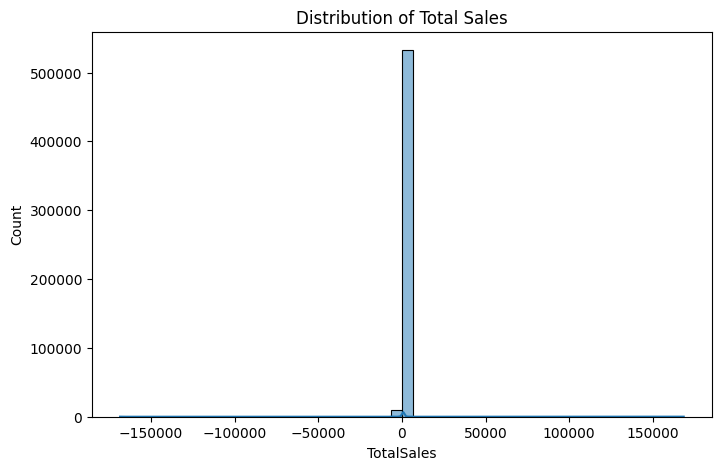

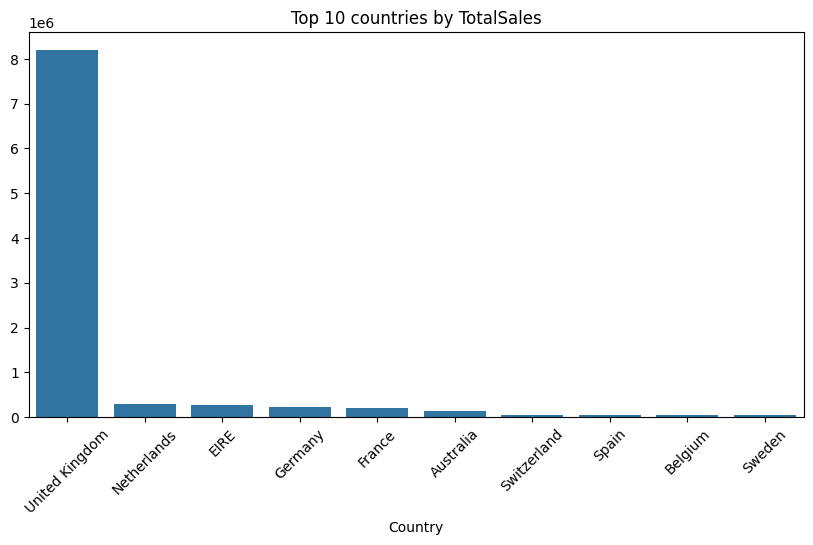

In [20]:
#Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['TotalSales'], bins=50,kde=True)
plt.title("Distribution of Total Sales")
plt.show()
#top 10 countries by sales
top_countries = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 countries by TotalSales")
plt.xticks(rotation=45)
plt.show()

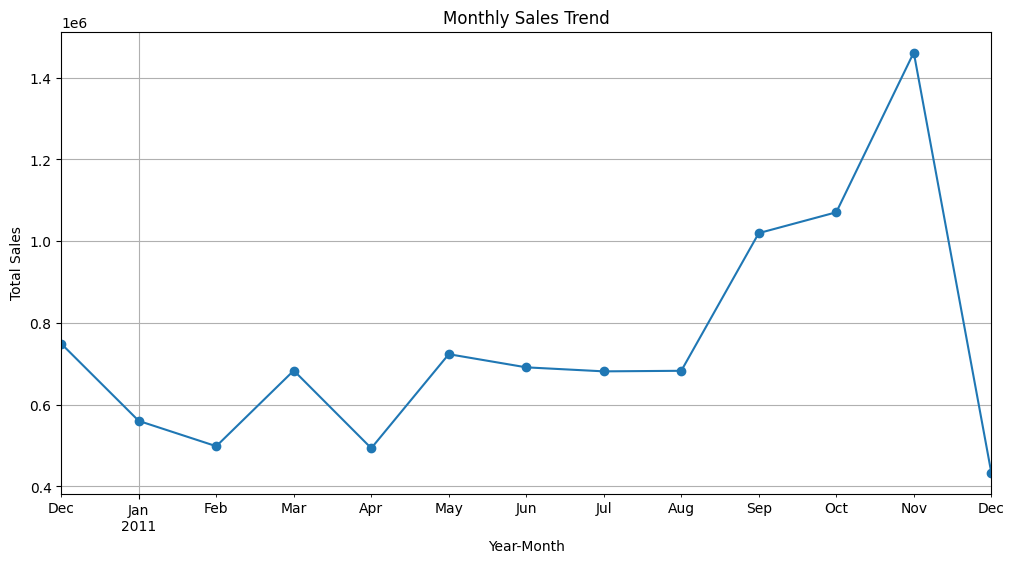

In [21]:
# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year-Month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth to see monthly sales trend
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


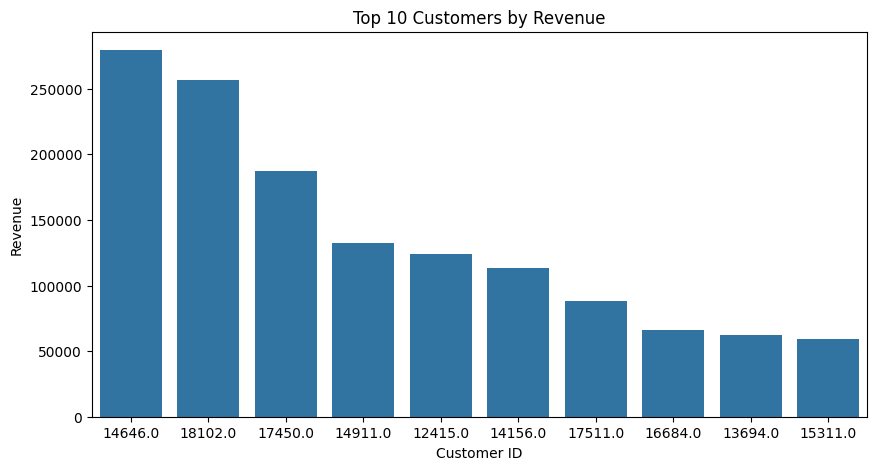

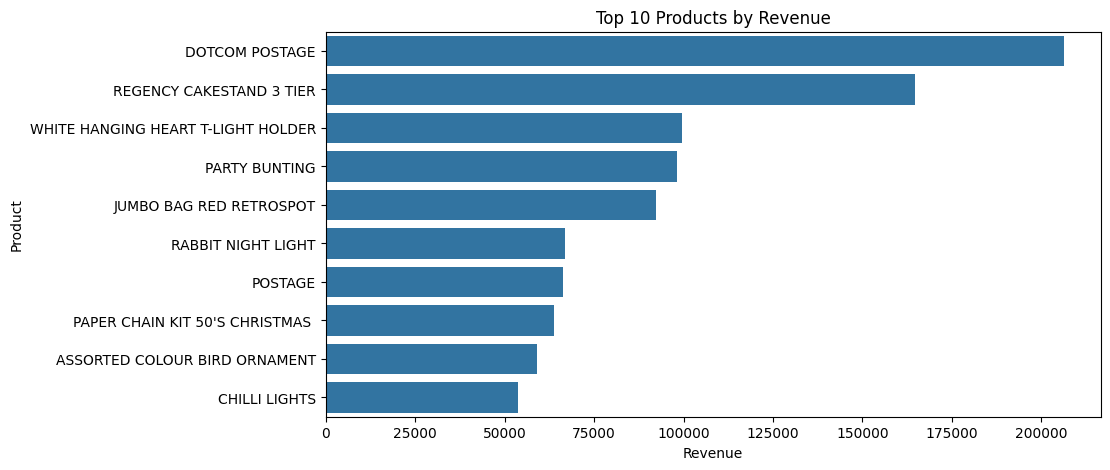

In [27]:
 # Top 10 customers by revenue
top_customers = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Customer ID")
plt.show()


# Top 10 products by revenue
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


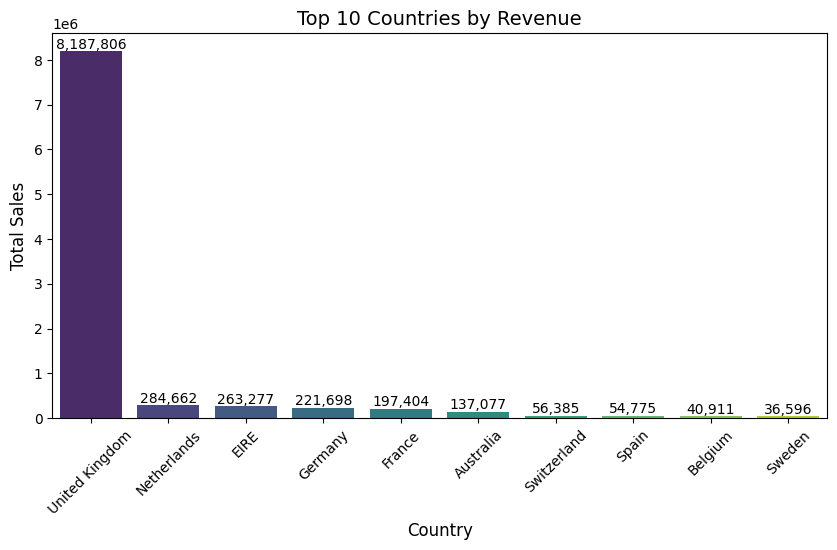

In [54]:
 # --- Top 10 Countries by Revenue ---
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    hue=top_countries.index,
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue", fontsize=14)
plt.ylabel("Total Sales", fontsize=12)
plt.xlabel("Country", fontsize=12)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()


 


In [ ]:
               an EDA summary
#At the end of your notebook, write down bullet-point style insights, like:

#The top 10 customers contribute a large share of revenue.

#The top 10 products are driving sales across multiple regions.

#The top 10 countries (e.g., UK, Germany, France, USA, etc.) account for most revenue.

#Sales seem concentrated in certain regions, indicating targeted opportunities.

In [56]:
plt.savefig("top_countries.png")


<Figure size 640x480 with 0 Axes>

In [58]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create PDF
doc = SimpleDocTemplate("EDA_Report.pdf")
styles = getSampleStyleSheet()
elements = []

elements.append(Paragraph("Retail Sales EDA Report", styles['Title']))
elements.append(Spacer(1, 12))

elements.append(Paragraph("Key Insights:", styles['Heading2']))
elements.append(Paragraph("1. Top 10 customers contribute the majority of sales.", styles['Normal']))
elements.append(Paragraph("2. Top 10 products are consistent revenue drivers.", styles['Normal']))
elements.append(Paragraph("3. Sales are concentrated in top 10 countries.", styles['Normal']))

# Add a chart (saved earlier as image)
elements.append(Image("top_countries.png", width=400, height=300))

doc.build(elements)


In [59]:
import os

# Get current working directory
print(os.getcwd())


C:\Users\GOPALAKRISHNA\Desktop\ai-retail-sales
